Simple RL
====================

Welcome! Here we'll showcase some basic examples of typical RL programming tasks.

Example 1: Grid World
----------

First, we'll grab our relevant imports: some agents, an MDP, an a function to facilitate running experiments and plotting:

In [1]:
# Enable autoreload
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Add simple_rl to system path.
import os
import sys
# parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# sys.path.insert(0, parent_dir)

from simple_rl.agents import QLearningAgent, RandomAgent
from simple_rl.tasks import GridWorldMDP
from simple_rl.run_experiments import run_agents_on_mdp

/home/banerjs/Workspaces/baselines/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<Figure size 432x288 with 0 Axes>

Next, we make an MDP and a few agents:

In [2]:
# Setup MDP.
mdp = GridWorldMDP(width=6, height=6, init_loc=(1,1), goal_locs=[(6,6)])

# Setup Agents.
ql_agent = QLearningAgent(actions=mdp.get_actions()) 
rand_agent = RandomAgent(actions=mdp.get_actions())

The real meat of <i>simple_rl</i> are the functions that run experiments. The first of which takes a list of agents and an mdp and simulates their interaction:

Running experiment: 
(MDP)
	gridworld_h-6_w-6
(Agents)
	Q-learning,0
	Random,1
(Params)
	instances : 5
	episodes : 100
	steps : 40
	gamma : 0.99
	track_disc_reward : False
	is_lifelong : False

Q-learning is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.

Random is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.


--- TIMES ---
Q-learning agent took 1.04 seconds.
Random agent took 0.34 seconds.
-------------

	Q-learning: 221.6 (conf_interv: 20.63 )
	Random: 12.8 (conf_interv: 4.05 )



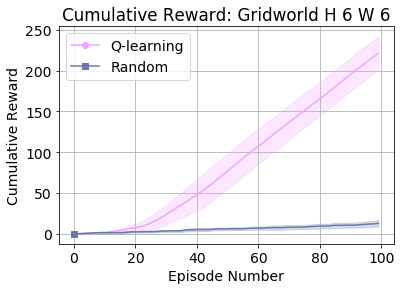

In [4]:
# Run experiment and make plot.
run_agents_on_mdp([ql_agent, rand_agent], mdp, instances=5, episodes=100, steps=40, reset_at_terminal=True, verbose=False)

We can throw R-Max, introduced by [[Brafman and Tennenholtz, 2002]](http://www.jmlr.org/papers/volume3/brafman02a/brafman02a.pdf) in the mix, too:

Running experiment: 
(MDP)
	gridworld_h-6_w-6
(Agents)
	RMax-h3,0
	Q-learning,1
	Random,2
(Params)
	instances : 5
	episodes : 100
	steps : 20
	gamma : 0.99
	track_disc_reward : False
	is_lifelong : False

RMax-h3 is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.

Q-learning is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.

Random is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.


--- TIMES ---
RMax-h3 agent took 34.96 seconds.
Q-learning agent took 0.52 seconds.
Random agent took 0.22 seconds.
-------------

	RMax-h3: 30.6 (conf_interv: 4.59 )
	Q-learning: 15.0 (conf_interv: 10.79 )
	Random: 1.8 (conf_interv: 0.86 )



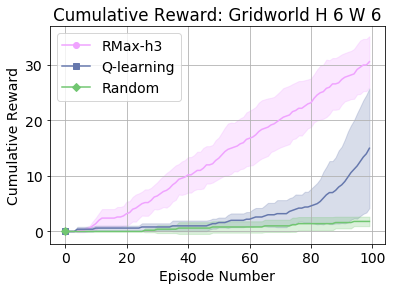

In [5]:
from simple_rl.agents import RMaxAgent

rmax_agent = RMaxAgent(actions=mdp.get_actions(), horizon=3, s_a_threshold=1)

# Run experiment and make plot.
run_agents_on_mdp([rmax_agent, ql_agent, rand_agent], mdp, instances=5, episodes=100, steps=20, reset_at_terminal=True, verbose=False)

Each experiment we run generates an Experiment object. This facilitates recording results, making relevant files, and plotting. When the <code>run_agents...</code> function is called, a <i>results</i> dir is created containing relevant experiment data. There should be a subdirectory in <i>results</i> named after the mdp you ran experiments on -- this is where the plot, agent results, and <i>parameters.txt</i> file are stored.

All of the above code is contained in the [<i>simple_example.py</i>](https://github.com/david-abel/simple_rl/blob/master/examples/simple_example.py) file. 

Example 2: Visuals (require pygame)
---------------

First let's make a FourRoomMDP from [[Sutton, Precup, Singh 1999]](http://ac.els-cdn.com/S0004370299000521/1-s2.0-S0004370299000521-main.pdf?_tid=e985f9ca-7b76-11e7-949a-00000aab0f26&acdnat=1502113811_cb6bca11a9512136fb3f55155abb4146), which is more visually interesting than a grid world.

In [8]:
from simple_rl.tasks import FourRoomMDP
four_room_mdp = FourRoomMDP(9, 9, goal_locs=[(9, 9)], gamma=0.95)

# Run experiment and make plot.
four_room_mdp.visualize_value()

Press anything to quit 


<img src="val.png" alt="Val" style="width: 400px;"/>

Or we can visualize a policy:

<img src="pol.png" alt="Val Visual" style="width: 400px;"/>

Both of these are in examples/viz_example.py. If you need pygame in anaconda, give this a shot:

    > conda install -c cogsci pygame

If you get an sdl font related error on Mac/Linux, try:

    > brew update sdl && sdl_tf

We can also make grid worlds with a text file. For instance, we can construct the grid problem from [[Barto and Pickett 2002]](https://www.researchgate.net/profile/Marc_Pickett/publication/2534967_PolicyBlocks_An_Algorithm_for_Creating_Useful_Macro-Actions_in_Reinforcement_Learning/links/0c960536b7efb97cd0000000.pdf) by making a text file:


    --w-----w---w----g
    --------w---------
    --w-----w---w-----
    --w-----w---w-----
    wwwww-wwwwwwwww-ww
    ---w----w----w----
    ---w---------w----
    --------w---------
    wwwwwwwww---------
    w-------wwwwwww-ww
    --w-----w---w-----
    --------w---------
    --w---------w-----
    --w-----w---w-----
    wwwww-wwwwwwwww-ww
    ---w-----w---w----
    ---w-----w---w----
    a--------w--------



Then, we make a grid world out of it:

In [9]:
from simple_rl.tasks.grid_world import GridWorldMDPClass

pblocks_mdp = GridWorldMDPClass.make_grid_world_from_file("pblocks_grid.txt", randomize=False)
pblocks_mdp.visualize_value()

Press anything to quit 


Which Produces:

<img src="pblocks.png" alt="Policy Blocks Grid World" style="width: 400px;"/>

Example 3: OOMDPs, Taxi
---------------

There's also a Taxi MDP, which is actually built on top of an Object Oriented MDP Abstract class from [[Diuk, Cohen, Littman 2008]](https://carlosdiuk.github.io/papers/OORL.pdf).

In [10]:
from simple_rl.tasks import TaxiOOMDP
from simple_rl.run_experiments import run_agents_on_mdp
from simple_rl.agents import QLearningAgent, RandomAgent

# Taxi initial state attributes..
agent = {"x":1, "y":1, "has_passenger":0}
passengers = [{"x":3, "y":2, "dest_x":2, "dest_y":3, "in_taxi":0}]
taxi_mdp = TaxiOOMDP(width=4, height=4, agent=agent, walls=[], passengers=passengers)

# Make agents.
ql_agent = QLearningAgent(actions=taxi_mdp.get_actions()) 
rand_agent = RandomAgent(actions=taxi_mdp.get_actions())

Above, we specify the objects of the OOMDP and their attributes. Now, just as before, we can let some agents interact with the MDP:

Running experiment: 
(MDP)
	taxi_h-4_w-4
(Agents)
	Q-learning,0
	Random,1
(Params)
	instances : 5
	episodes : 100
	steps : 150
	gamma : 0.99
	track_disc_reward : False
	is_lifelong : False

Q-learning is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.

Random is learning.
  Instance 1 of 5.
  Instance 2 of 5.
  Instance 3 of 5.
  Instance 4 of 5.
  Instance 5 of 5.


--- TIMES ---
Q-learning agent took 40.77 seconds.
Random agent took 11.38 seconds.
-------------

	Q-learning: 1202.4 (conf_interv: 231.73 )
	Random: 8.6 (conf_interv: 0.43 )



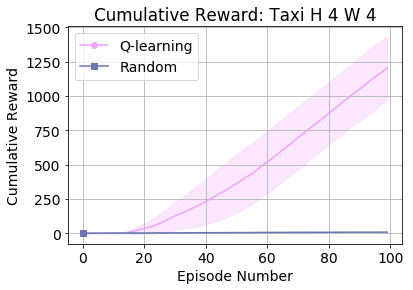

In [11]:
# Run experiment and make plot.
run_agents_on_mdp([ql_agent, rand_agent], taxi_mdp, instances=5, episodes=100, steps=150, reset_at_terminal=True)

More on OOMDPs in [<i>examples/oomdp_example.py</i>](https://github.com/david-abel/simple_rl/blob/master/examples/oomdp_example.py)

Example 4: Markov Games
    --------

I've added a few markov games, including rock paper scissors, grid games, and prisoners dilemma. Just as before, we get a run agents method that simulates learning and makes a plot:

Running experiment: 
(Markov Game MDP)
	rock_paper_scissors
(Agents)
	Q-learning,0
	fixed-policy,1
(Params)
	instances : 10
	track_disc_reward : False
	is_lifelong : False

	Instance 1 of 10.
	Instance 2 of 10.
	Instance 3 of 10.
	Instance 4 of 10.
	Instance 5 of 10.
	Instance 6 of 10.
	Instance 7 of 10.
	Instance 8 of 10.
	Instance 9 of 10.
	Instance 10 of 10.
Experiment took 0.04 seconds.
	Q-learning: 6.3 (conf_interv: 1.11 )
	fixed-policy: -6.3 (conf_interv: 1.11 )



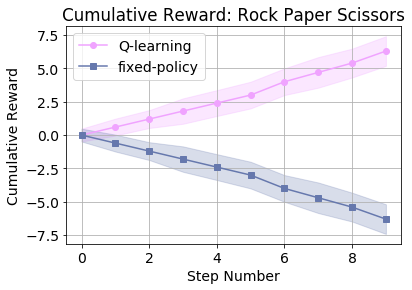

In [12]:
from simple_rl.run_experiments import play_markov_game
from simple_rl.agents import QLearningAgent, FixedPolicyAgent
from simple_rl.tasks import RockPaperScissorsMDP

import random

# Setup MDP, Agents.
markov_game = RockPaperScissorsMDP()
ql_agent = QLearningAgent(actions=markov_game.get_actions(), epsilon=0.2) 
fixed_action = random.choice(markov_game.get_actions())
fixed_agent = FixedPolicyAgent(policy=lambda s:fixed_action)

# Run experiment and make plot.
play_markov_game([ql_agent, fixed_agent], markov_game, instances=10, episodes=1, steps=10)

Example 5: Gym MDP
    --------

Recently I added support for making OpenAI gym MDPs. It's again only a few lines of code:

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Running experiment: 
(MDP)
	gym-CartPole-v0
(Agents)
	Linear-Q-rbf,0
(Params)
	instances : 3
	episodes : 1
	steps : 50
	gamma : 0.99
	track_disc_reward : False
	is_lifelong : False

Linear-Q-rbf is learning.
  Instance 1 of 3.
  Instance 2 of 3.
  Instance 3 of 3.


--- TIMES ---
Linear-Q-rbf agent took 0.08 seconds.
-------------

	Linear-Q-rbf: 12.0 (conf_interv: 3.2 )



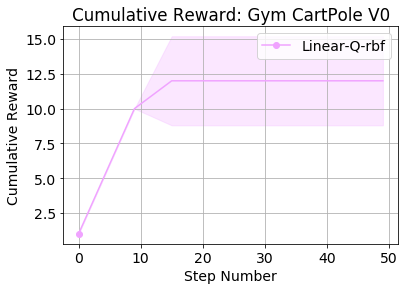

In [13]:
from simple_rl.tasks import GymMDP
from simple_rl.agents import LinearQAgent, RandomAgent
from simple_rl.run_experiments import run_agents_on_mdp

# Gym MDP.
gym_mdp = GymMDP(env_name='CartPole-v0', render=False) # If render is true, visualizes interactions.
num_feats = gym_mdp.get_num_state_feats()

# Setup agents and run.
lin_agent = LinearQAgent(gym_mdp.get_actions(), num_features=num_feats, alpha=0.2, epsilon=0.4, rbf=True)

run_agents_on_mdp([lin_agent], gym_mdp, instances=3, episodes=1, steps=50)